# ECE 447 Assignment 1 - Youssef Ismail


### Question 1


Both are inductive biases which occur when choosing different ML algorithims.

Restriction bias is the bias formed from choosing certain classes of models over others, like only selecting tree or linear models.

Preference bias is the bias of certain models over others within a certain class of model such as choosing shallow trees over larger trees.

A difference between them is that preference bias is typically more focussed on biases within classes of models while restriction bias is a more general bias on the types of models considered initally.


### Question 2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Read input data
df = pd.read_csv("data/data-Q2.csv")
df.head()

,Country,Life Expectancy,Infant Mortality,Education,Health,Health USD
0,Argentina,75.592,13.5,16.841,9.525,734.093
1,Cameroon,53.288,67.7,7.137,4.915,60.412
2,Chile,78.936,7.8,17.356,8.400,801.915
3,Colombia,73.213,16.5,15.589,7.600,391.859
4,Cuba,78.552,4.8,44.173,12.100,672.204


In [10]:
# Calculate the correlation between the LIFE EXPECTANCY and all other features.
corr = df.drop("Country", axis=1).corr()
corr

,Life Expectancy,Infant Mortality,Education,Health,Health USD
Life Expectancy,1.000000,-0.960733,0.476788,0.572329,0.776000
Infant Mortality,-0.960733,1.000000,-0.504438,-0.500287,-0.735988
Education,0.476788,-0.504438,1.000000,0.689247,0.527062
Health,0.572329,-0.500287,0.689247,1.000000,0.759742
Health USD,0.776000,-0.735988,0.527062,0.759742,1.000000


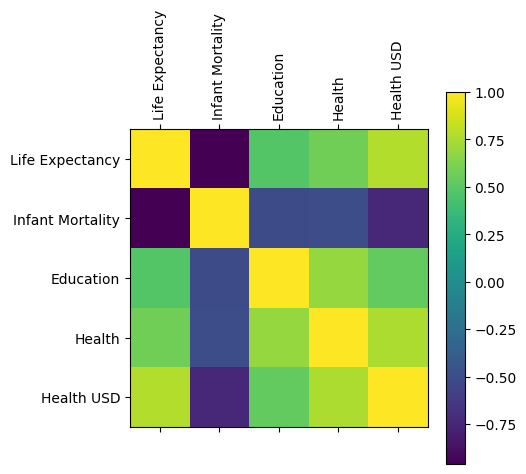

In [15]:
# Plot the correlation matrix as a heatmap
plt.matshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.xticks(rotation=90)
plt.show()

We can notice a few trends in the data:

1. Infant mortality and life exptancy are negatively correlated. This is because countries with higher infant mortality rates will have lower life expectancy.

2. Health USD spending and life expectancy are positively correlated. This is because countries with higher health spending will have better health care and higher life expectancy.

3. Infant mortality and health USD spending are negatively correlated. This is because countries with higher health spending will have better health care and lower infant mortality.

4. An interesting trend is that Health spending as a percentage of GDP does not seem to be as correlated with life expectancy as health spending in USD.
   This might be because countries with higher GDP will have higher health spending in USD, but not necessarily higher health spending as a percentage of GDP.


### Question 3


In [24]:
# Read input data
df = pd.read_csv("data/data-Q3.csv")
df.head()

,ID,Target,Model 1 Score,Model 2 Score
0,1,False,0.1026,0.2089
1,2,False,0.2937,0.0080
2,3,True,0.5120,0.8378
3,4,True,0.8645,0.7160
4,5,False,0.1987,0.1891


#### 3a


In [25]:
# Transform every score into a 0 or 1 based on threshold
threshold = 0.6

df[["Model 1 Score Pred", "Model 2 Score Pred"]] = (
    df[["Model 1 Score", "Model 2 Score"]] >= threshold
)
df.head()

,ID,Target,Model 1 Score,Model 2 Score,Model 1 Score Pred,Model 2 Score Pred
0,1,False,0.1026,0.2089,False,False
1,2,False,0.2937,0.0080,False,False
2,3,True,0.5120,0.8378,False,True
3,4,True,0.8645,0.7160,True,True
4,5,False,0.1987,0.1891,False,False


In [44]:
# Construct a confusion matrix for each model
cm1 = pd.crosstab(
    df["Target"], df["Model 1 Score Pred"], rownames=["Actual"], colnames=["Predicted"]
)

cm2 = pd.crosstab(
    df["Target"], df["Model 2 Score Pred"], rownames=["Actual"], colnames=["Predicted"]
)

# Make sure True and False are in the right order
cm1.sort_index(axis=1, inplace=True, ascending=False)
cm1.sort_index(axis=0, inplace=True, ascending=False)
cm2.sort_index(axis=1, inplace=True, ascending=False)
cm2.sort_index(axis=0, inplace=True, ascending=False)


display("Confusion Matrix Model 1", cm1)
display("Confusion Matrix Model 2", cm2)

'Confusion Matrix Model 1'

Predicted,True,False
Actual,,
True,11,6
False,2,11


'Confusion Matrix Model 2'

Predicted,True,False
Actual,,
True,14,3
False,0,13


#### 3b


In [50]:
def accuracy(cm):
    tp, fn, fp, tn = cm.values.ravel()
    return (tp + tn) / (tp + tn + fp + fn)


def averageClassAccuracy(cm):
    tp, fn, fp, tn = cm.values.ravel()
    return (tp / (tp + fn) + tn / (tn + fp)) / 2


print(f"Model 1 Accuracy: {accuracy(cm1):.2f}")
print(f"Model 2 Accuracy: {accuracy(cm2):.2f}")
print("------------")
print(f"Model 1 Average Class Accuracy: {averageClassAccuracy(cm1):.2f}")
print(f"Model 2 Average Class Accuracy: {averageClassAccuracy(cm2):.2f}")

Model 1 Accuracy: 0.73
Model 2 Accuracy: 0.90
------------
Model 1 Average Class Accuracy: 0.75
Model 2 Average Class Accuracy: 0.91


#### 3c


Based on the average class accuracy, Model 2 appears to perform better.


#### 3d


In [ ]:
def gain(cm):
    tp, fn, *_ = cm.values.ravel()
    return tp / (tp + fn)